## Generate inputs for clustering and visualizations

In [1]:
# imports needed
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
import scipy.io
from skimage import io
from sklearn.datasets import make_blobs
import pandas as pd

In [63]:
N_SAMPLES = 1000000
RANDOM_STATE = 42

In [64]:
# Generate some training data from clustering
X, y = make_blobs(n_samples=N_SAMPLES,
                  cluster_std=[0.5, 0.5, 0.5, 0.5, 0.5],
                  centers=[(-10, -10), (0, 0), (12, 5), (-10, 10), (-10, 20)],
                  random_state=RANDOM_STATE)

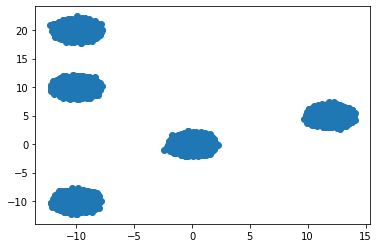

In [65]:
plt.scatter(X[:, 0], X[:, 1])

In [66]:
output = pd.DataFrame(X)

In [67]:
output.to_csv("input.csv", index = False, header = False)

In [73]:
result = pd.read_csv("result.csv")

In [74]:
result

,f0,f1,labels
0,-10.766700,-9.996030,0
1,-10.191500,-10.326000,0
2,-9.716180,-9.198530,0
3,-10.199100,-10.526900,0
4,11.941900,4.655130,4
...,...,...,...
999995,-9.261470,10.083900,2
999996,-10.113000,19.781200,2
999997,-0.968277,0.060098,3
999998,11.073000,5.657260,4


In [75]:
x0 = np.asarray(result[result.labels == 0])
x1 = np.asarray(result[result.labels == 1])
x2 = np.asarray(result[result.labels == 2])
x3 = np.asarray(result[result.labels == 3])
x4 = np.asarray(result[result.labels == 4])

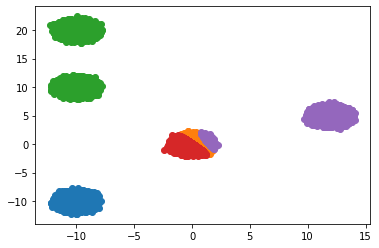

In [76]:
plt.scatter(x0[:, 0], x0[:, 1])
plt.scatter(x1[:, 0], x1[:, 1])
plt.scatter(x2[:, 0], x2[:, 1])
plt.scatter(x3[:, 0], x3[:, 1])
plt.scatter(x4[:, 0], x4[:, 1])
plt.show()